# 調整飽和度

飽和度是色彩的純度或鮮豔度，以白色缺乏程度表示。飽和度 100% 的色彩不包含任何白色。飽和度 0% 的色彩帶點灰色。


飽和度是色彩的鮮豔度。想像亮橘色，這是相當鮮豔的色彩。隨著彩度降低（色相和明度保持不變），橘色就會逐次變成褐色、褐灰色，最後是中性灰色（飽和度降至 0 之後）。
* 降低飽和度會使色彩流失，只剩下灰階元素。褐灰色和淡紫色都是飽和度低的色彩，因為兩色皆相當中性，只有少許色彩元素。
* 蘋果紅和香蕉黃是飽和度很高的色彩。飽和度是可測量色彩與相同亮度的中性灰之間的差異程度。

在數位影像中，提高飽和度可讓影像色彩更鮮豔、更有「震撼力」，但是飽和度太高也會扭曲色彩，造成膚色不自然等問題。您可以使用「自然飽和色調」控制項，將目標僅設定在低飽和度的區域，而不影響影像的其餘區域。例如，您可以加強影像飽和度較低部分的色彩，而不顯著改變膚色。

http://help.corel.com/paintshop-pro/v20/main/ct/documentation/index.html#page/Corel_PaintShop_Pro/Adjusting_hue_and_saturation.html

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
from IPython.display import clear_output

In [2]:
def show_img(img):
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.show()

In [60]:
def modify_brightness_saturation(img):

    # 圖像歸一化，且轉換為浮點型
    fImg = img.astype(np.float32)
    fImg = fImg / 255.0
    # 顏色空間轉換 BGR -> HLS
    hlsImg = cv2.cvtColor(fImg, cv2.COLOR_BGR2HLS)
    l = 100
    s = 100
    MAX_VALUE = 100

    hlsCopy = np.copy(hlsImg)

    l = 100
    s = 300

    # 1.調整亮度（線性變換) , 2.將hlsCopy[:, :, 1]和hlsCopy[:, :, 2]中大於1的全部截取
    hlsCopy[:, :, 1] = (l / float(MAX_VALUE)) * hlsCopy[:, :, 1]
#     hlsCopy[:, :, 1][hlsCopy[:, :, 1] > 1] = 1
    # 飽和度
    hlsCopy[:, :, 2] = (s / float(MAX_VALUE)) * hlsCopy[:, :, 2]
#     hlsCopy[:, :, 2][hlsCopy[:, :, 2] > 1] = 1
    # HLS2BGR
    lsImg = cv2.cvtColor(hlsCopy, cv2.COLOR_HLS2BGR)

    show_img(lsImg)

    
    

In [61]:
def img_processing(img):
    # do something here
    modify_brightness_saturation(img)


origin picture:


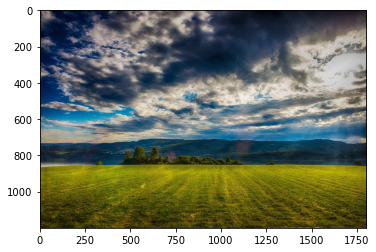

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


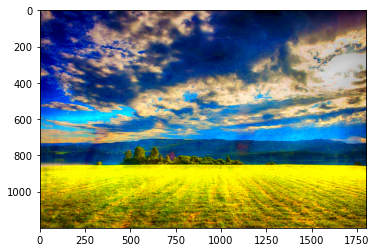

In [62]:
file_name = "./testdata/scenery.jpg"
origin_img = cv2.imread(file_name)
print("origin picture:")
show_img(origin_img)

result_img = img_processing(origin_img)
# show_img(result_img)

# Reference

http://help.corel.com/paintshop-pro/v20/main/ct/documentation/index.html#page/Corel_PaintShop_Pro/Adjusting_hue_and_saturation.html

https://www.itdaan.com/tw/6488189fb5d7d60b163039cd0a004f70

https://zhuanlan.zhihu.com/p/67930839